In [5]:
# bibliothèque
# import des bibliothèque
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA

# feature selection RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature selection chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature selection from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier


import warnings # current verimport matplotlib.pyplot as pltsion of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [6]:
# Lecture de données
filename = "covtype.data"


inf=[""]*55
names=["Elevation","Aspect","Slope",
       "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
       "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
       "Horizontal_Distance_To_Fire_Points",'Wilderness_Area_1','Wilderness_Area_2',
       'Wilderness_Area_3','Wilderness_Area_4']
inf[0:len(names)]=names
print(len(names))       
sole_type=[]
    
for i in range(len(names),54):
    val = "Soil_Type_"+str(i-len(names)+1)
    inf[i]=val
    sole_type.append(val)
inf[54]="Cover_Type"

data = pd.read_csv(filename,names= inf)
data.head(2)



14


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5


In [7]:
# Data (laod data)
X = data.drop(["Cover_Type","Vertical_Distance_To_Hydrology"],axis=1)
Y = data["Cover_Type"]
y = data["Cover_Type"]

In [20]:
y = data["Cover_Type"]

In [8]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

# load data
K = 10 # number of feature to select

# feature extraction
test = SelectKBest(score_func=chi2, k=K)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:K,:])
#print(dir(features))
# Get the features names
#indices_of_feature = np.flip(np.argsort(fit.scores_))
#print(indices_of_feature)

# Print the names of the 10 first futures
#print(inf[indices_of_feature[0]])

indices_of_feature = np.flip(np.argsort(fit.scores_))
print(indices_of_feature)
indices_of_first_feature =indices_of_feature[0:K]
feature_name_SelectKBest = np.take(inf,np.sort(indices_of_first_feature))
#feature_name2 = np.take(inf,indices_of_first_feature)
print(feature_name_SelectKBest)
#print(feature_name2)
# Print the names of the 10 first futures
#print(inf[indices_of_feature[0]])

[[2596   51    3  258  510 6279    0    0    0    0]
 [2590   56    2  212  390 6225    0    0    0    0]
 [2804  139    9  268 3180 6121    0    0    0    0]
 [2785  155   18  242 3090 6211    0    0    0    0]
 [2595   45    2  153  391 6172    0    0    0    0]
 [2579  132    6  300   67 6031    0    0    0    0]
 [2606   45    7  270  633 6256    0    0    0    0]
 [2605   49    4  234  573 6228    0    0    0    0]
 [2617   45    9  240  666 6244    0    0    0    0]
 [2612   59   10  247  636 6230    0    0    0    0]]
[ 4  8  0  3 12  1  2 22 16 50  7  5 51 15 14 18 52  9  6 13 34 24 29 35
 41 17 26 47 10 42 25 49 23 44 45 11 36 43 30 38 31 33 32 46 48 28 40 21
 39 37 19 27 20]
['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Hillshade_3pm' 'Wilderness_Area_3'
 'Soil_Type_3' 'Soil_Type_9' 'Soil_Type_37']


In [9]:
# Feature Extraction with RFE

# load data

# feature extraction
#model = LogisticRegression()
#rfe = RFE(model, 3)
# fit = rfe.fit(X, Y)
# print("Num Features: %d") % fit.n_features_
# print("Selected Features: %s") % fit.support_
# print("Feature Ranking: %s") % fit.ranking_

In [10]:
# Feature Importance with Extra Trees Classifier
#from pandas import read_csv
#from sklearn.ensemble import ExtraTreesClassifier
# load data
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = read_csv(url, names=names)
#array = dataframe.values
#X# = array[:,0:8]
#Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
#print(model.feature_importances_)
#print(dir(model))

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
indices_of_feature = np.flip(np.argsort(model.feature_importances_))
print(indices_of_feature)
indices_of_first_feature =indices_of_feature[0:K]
feature_name_ExtraTreeClassifier = np.take(inf,np.sort(indices_of_first_feature))
#feature_name2 = np.take(inf,indices_of_first_feature)
print(feature_name_ExtraTreeClassifier)

[ 0  4  8  3  1 12  6  5  7  2 34 16 51 50 24 35 11 14  9 22 52 10 25 41
 44 42 36 45 43 23 15 29 47 32 18 33 31 39 46 28 49 38 26 13 30 17 37 40
 21 48 19 20 27]
['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm' 'Wilderness_Area_3']


In [12]:
# comparaison des deux modèles
print("feature_name_SelectKBest",feature_name_SelectKBest)
print("\n=====================\n")
print("\n=====================\n")
print("feature_name_ExtraTreeClassifier",feature_name_ExtraTreeClassifier)


feature_name_SelectKBest ['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Hillshade_3pm' 'Wilderness_Area_3'
 'Soil_Type_3' 'Soil_Type_9' 'Soil_Type_37']




feature_name_ExtraTreeClassifier ['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm' 'Wilderness_Area_3']


In [13]:
# définition des première variables les plus importante à choisir
# En se basant sur les deux modèle de choix sur 10 variables 
# on a choisi 7 variables pour le début
important_features = ['Elevation','Aspect' ,'Slope', 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology' ,'Hillshade_3pm' ,'Wilderness_Area_3']

In [14]:
data_feature_choosed = data[important_features]
data_feature_choosed.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_3pm,Wilderness_Area_3
0,2596,51,3,258,0,148,0
1,2590,56,2,212,-6,151,0


In [15]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


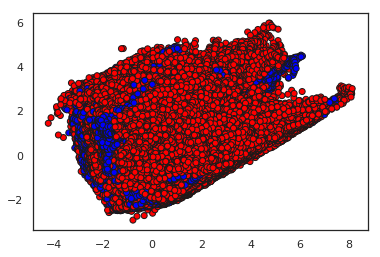

In [39]:
#Step 1: Standardize the Dataset
X = StandardScaler().fit_transform(data_feature_choosed)
#Step 2: Create a Covariance Matrix
pca = PCA(n_components=7)
pc = pca.fit_transform(X)
#print(pca[:,0],pca[0:1])

pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4',"PC5","PC6","PC7"])
pc_df['Cluster'] = Y
pc_df.head(2)

plt.scatter(pc_df["PC1"],pc_df["PC2"],c=Y, cmap=cm_bright,edgecolors='k')
plt.show()


In [40]:
# process dataset, split into training and tst part
X = StandardScaler().fit_transform(data_feature_choosed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

figure = plt.figure(figsize=(27, 9))
# process dataset, split into training and tst part
X = StandardScaler().fit_transform(data_feature_choosed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, 1)

ax.set_title("Input data")
#Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
#Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

i = 2
# iterate over classifiers
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
'''
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            print("ici")
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
'''
plt.tight_layout()
plt.show()
